<a href="https://colab.research.google.com/github/21219keshav/Deep-Learning/blob/main/experiment13_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.losses import MeanSquaredError
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [ ]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train, X_val = X_train[:-10000],X_train[-10000]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_val = X_val.astype("float32")/255

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])
print(X_val.shape[0])

50000
10000
28


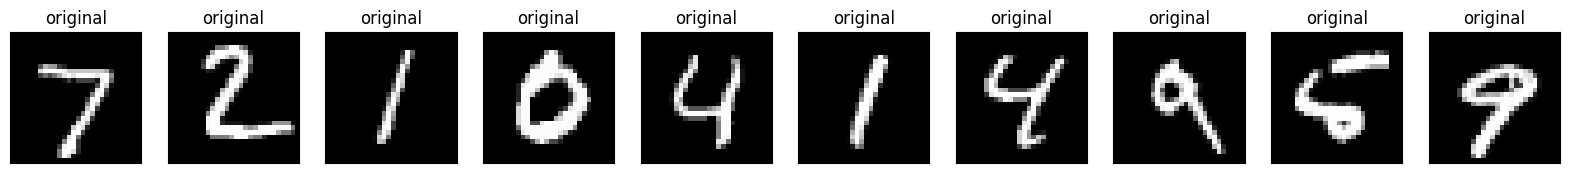

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
latent_dim = 64
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim=latent_dim

    self.encoder=keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(latent_dim, activation='relu')])

    self.decoder=keras.Sequential([keras.layers.Dense(latent_dim, activation='sigmoid'), keras.layers.Reshape((28,28))])

  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(x)
    return decoded
a = Autoencoder(latent_dim)

In [ ]:
a.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())
a.fit(X_train, X_train, epochs = 10, shuffle = True, validation_data=(X_val, X_val))

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file2cb6_yuj.py", line 11, in tf__call
        decoded = ag__.converted_call(ag__.ld(self).decoder, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer 'autoencoder' (type Autoencoder).
    
    in user code:
    
        File "<ipython-input-6-99e5084ed0a4>", line 13, in call  *
            decoded=self.decoder(x)
        File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py", line 118, in _fix_unknown_dimension
            raise ValueError(msg)
    
        ValueError: Exception encountered when calling layer 'reshape' (type Reshape).
        
        total size of new array must be unchanged, input_shape = [28, 64], output_shape = [28, 28]
        
        Call arguments received by layer 'reshape' (type Reshape):
          • inputs=tf.Tensor(shape=(None, 28, 64), dtype=float32)
    
    
    Call arguments received by layer 'autoencoder' (type Autoencoder):
      • x=tf.Tensor(shape=(None, 28, 28), dtype=float32)
